In [1]:
import numpy as np
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
mapache = misc.face()

In [3]:
def ajustar_pixeles(img, cells):
    new_img = img
    if(img.shape[0] % cells != 0):
        new_img, extra = np.split(new_img, [(img.shape[0] // cells)*cells])
    if(img.shape[1] % cells != 0):
        new_img, extra = np.hsplit(new_img, [(img.shape[1] // cells)*cells])
    return new_img

In [4]:
def destructurar_imagen(imagen, cells):
    ajusted_img = ajustar_pixeles(imagen, cells)
    h_arr = np.split(ajusted_img, cells)
    new_arr = []
    for h_col in h_arr:
        new_arr.append(np.hsplit(h_col, cells))  
    return new_arr

def crear_hueco(arr):
    nparr = np.array(arr)
    parts = len(arr)
    dim = [nparr.shape[2], nparr.shape[3], nparr.shape[4]]
    new_arr = np.concatenate(arr)
    num_random = np.random.randint(parts * parts)
    new_arr[num_random] = np.zeros(dim)
    new_new_arr = np.split(new_arr, parts)
    return [np.array(new_new_arr), [ num_random // parts, num_random  % parts ]]

def reestructurar_imagen(arr):
    new_arr = []
    for h_arr in arr:
        new_arr.append(np.concatenate(h_arr, axis=1))
    new_mapache = np.concatenate(new_arr)
    return new_mapache

# plt.imshow(reestructurar_imagen(destructurar_imagen(ajustar_pixeles(mapache, 7), 7)))

In [5]:
def change_position(arr, position_arr, direction):
    nparr = np.array(arr)
    dim = [nparr.shape[2], nparr.shape[3], nparr.shape[4]]
    def top():
        if(position_arr[0] < (len(arr) - 1)):
            arr[position_arr[0]][position_arr[1]] = arr[position_arr[0] + 1][position_arr[1]]
            arr[position_arr[0] + 1][position_arr[1]] = np.zeros(dim)
            return [position_arr[0] + 1, position_arr[1]]
    def right():
        if(position_arr[1] > 0):
            arr[position_arr[0]][position_arr[1]] = arr[position_arr[0]][position_arr[1] - 1]
            arr[position_arr[0]][position_arr[1] - 1] = np.zeros(dim)
            return [position_arr[0], position_arr[1] - 1]
    def down():
        if(position_arr[0] > 0):
            arr[position_arr[0]][position_arr[1]] = arr[position_arr[0] - 1][position_arr[1]]
            arr[position_arr[0] - 1][position_arr[1]] = np.zeros(dim)
            return [position_arr[0] - 1, position_arr[1]]
    def left():
        if(position_arr[1] < (len(arr) - 1)):
            arr[position_arr[0]][position_arr[1]] = arr[position_arr[0]][position_arr[1] + 1]
            arr[position_arr[0]][position_arr[1] + 1] = np.zeros(dim)
            return [position_arr[0], position_arr[1] + 1]
    positions = {
        'w': top,
        'd': right,
        's': down,
        'a': left,
    }
    new_position = positions[direction]()
    if(new_position):
        return [arr, new_position]
    else:
        return [arr, position_arr]

In [6]:
def desorder_img(arr):
    parts = len(arr)
    new_concat_arr = np.concatenate(arr)
    np.random.shuffle(new_concat_arr)
    new_new_arr = np.split(new_concat_arr, parts)
    return new_new_arr

def is_img_ordered(original_img, actual_img):
    if(original_img == actual_img):
        print('Congratulations!!!!!!!!')
    pass

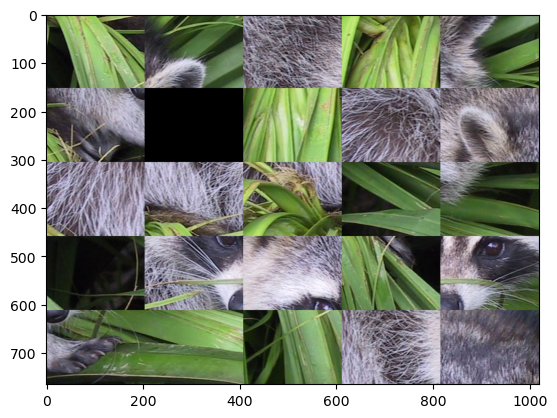

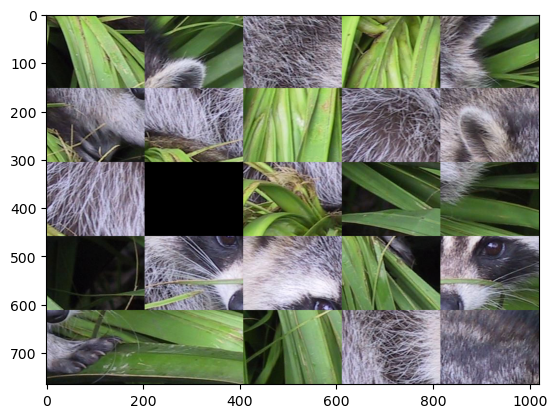

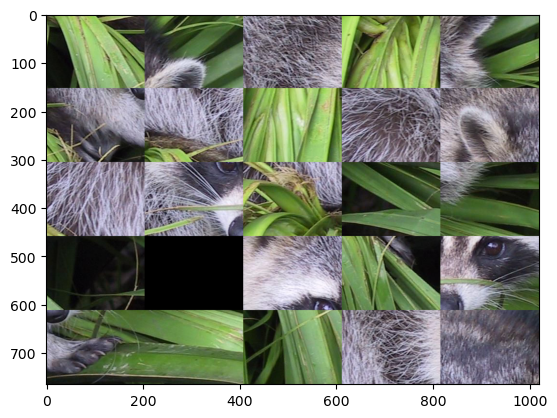

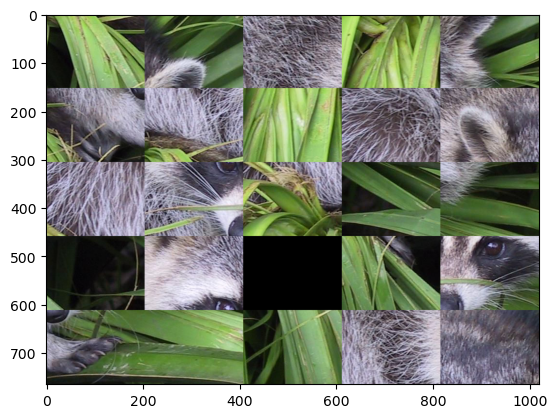

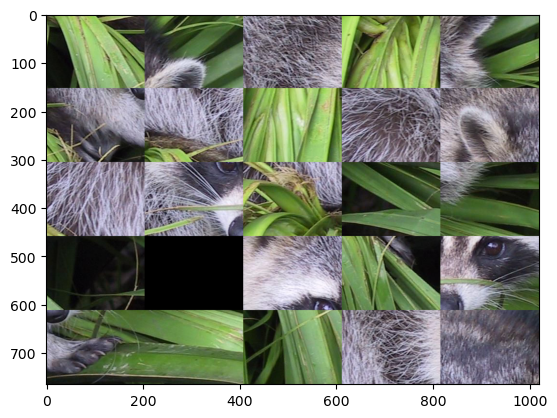

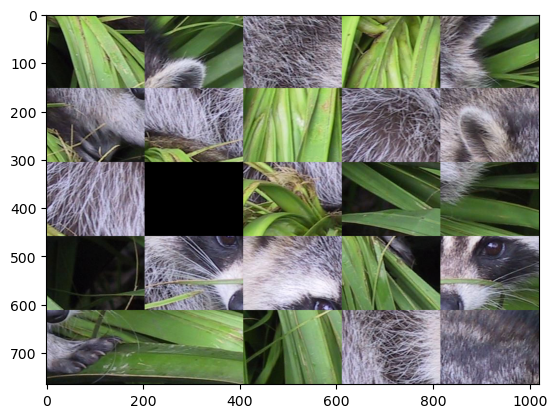

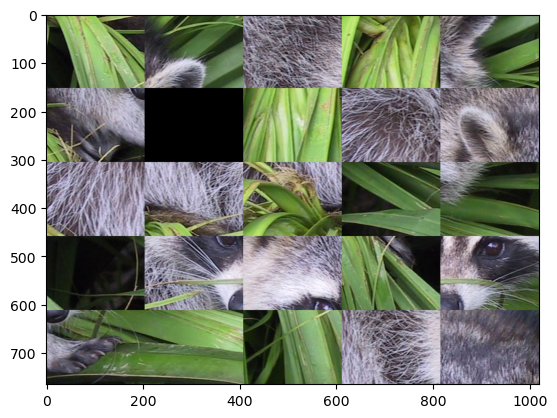

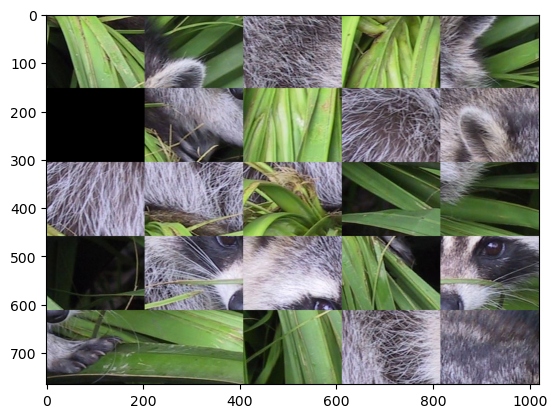

KeyError: ''

In [8]:
num_cells = int(input('Num of cells: '))
x = 'o'
start_img = crear_hueco(desorder_img(destructurar_imagen(mapache, num_cells)))
plt.imshow(reestructurar_imagen(start_img[0]))
plt.show()

while x != 'e':
    x = input('Key: ')
    if(x == 'e'):
        break
    start_img = change_position(start_img[0], start_img[1], x)
    plt.imshow(reestructurar_imagen(start_img[0]))
    plt.show()